 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="https://localhost:8889/notebooks/BackRiverFlowFiles-USA.ipynb#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="https://localhost:8889/notebooks/BackRiverFlowFiles-USA.ipynb#Output-FileName" data-toc-modified-id="Output-FileName-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Output FileName</a></span></li><li><span><a href="https://localhost:8889/notebooks/BackRiverFlowFiles-USA.ipynb#Historical-Data" data-toc-modified-id="Historical-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Historical Data</a></span></li><li><span><a href="https://localhost:8889/notebooks/BackRiverFlowFiles-USA.ipynb#Realtime-Data" data-toc-modified-id="Realtime-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Realtime Data</a></span></li><li><span><a href="https://localhost:8889/notebooks/BackRiverFlowFiles-USA.ipynb#Concatenate-Historical-and-Real" data-toc-modified-id="Concatenate-Historical-and-Real-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Concatenate Historical and Real</a></span></li></ul></div>

Process US downloaded files to produce river files

# Imports #

In [1]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Output FileName #

In [14]:
filename = 'dec_Greenwater_Greenwater_flow'

# Get Data #

In [15]:
skiprows = 31
names = ['agency', 'site', 'datetime', 'flow', 'comment']
extras = []
if filename in ['Deschutes', 'Snohomish_Monroe_flow']:
    skiprows = 32
print (skiprows)
if filename == 'Snohomish_Monroe_flow':
    extras = ['more', 'stuff']
    names = names + extras
data = pd.read_csv('hydro_files/index.html?format=rdb&sites=12097500&startDT=2022-01-01&endDT=2023-01-08&parameterCd=00060&siteStatus=all',
                   skiprows=skiprows, sep='\t',
                   names=names,
                  infer_datetime_format=True)
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.set_index('datetime')
data = data.drop(['agency', 'site']+extras, axis=1)
data.flow = data.flow * 0.0283168   # convert to m3/s
data[:5]

31


,flow,comment
datetime,,
2022-01-01,3.567917,A
2022-01-02,3.454650,A
2022-01-03,3.567917,A
2022-01-04,3.341382,A
2022-01-05,3.256432,A


In [16]:
data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day
data[:5]

,flow,comment,year,month,day
datetime,,,,,
2022-01-01,3.567917,A,2022,1,1
2022-01-02,3.454650,A,2022,1,2
2022-01-03,3.567917,A,2022,1,3
2022-01-04,3.341382,A,2022,1,4
2022-01-05,3.256432,A,2022,1,5


In [17]:
outdata = pd.DataFrame({'year': data.year,
                        'month': data.month,
                        'day': data.day,
                        'discharge': data.flow,
                        'comment': data.comment}, columns=['year', 'month', 'day',
                                                       'discharge', 'comment'])

In [18]:
outdata[-5:]

,year,month,day,discharge,comment
datetime,,,,,
2023-01-03,2023,1,3,6.456230,P
2023-01-04,2023,1,4,5.861578,P
2023-01-05,2023,1,5,5.521776,P
2023-01-06,2023,1,6,5.125341,P
2023-01-07,2023,1,7,5.068707,P


In [19]:
outdata.to_csv(path_or_buf=filename, sep=' ',
               columns=['year', 'month', 'day', 'discharge', 'comment'],
               header=False, index=False, float_format="%.6E")

In [58]:
alltogether = pd.read_csv(filename, header=None, index_col=False, sep=' ',
                          names=['Year', 'Month', 'Day', 'Flow'])

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


In [59]:
alltogether.index = pd.to_datetime(alltogether.drop(['Flow'], axis=1))

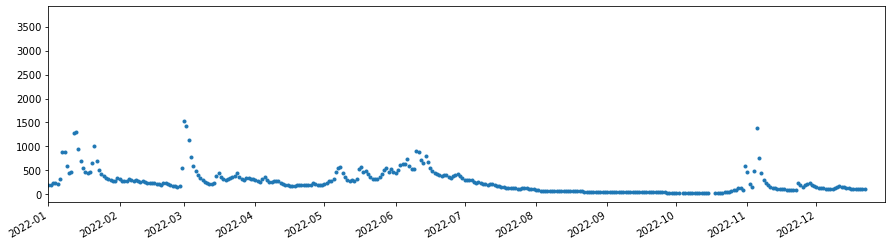

In [62]:
alltogether.Flow.plot(figsize=(15,4), marker='.', linewidth=0,
                      xlim=(datetime.date(2022, 1, 1), datetime.date(2022, 12, 31)));